# A Feedforward Neural Network in R with S3 Classes

---

__Elliott Forney - 2020__

In [1]:
x <- seq(-2*pi, 2*pi, length=100)
y0 <- sin(x)
g <- y0 + 0.25 * rnorm(length(x))

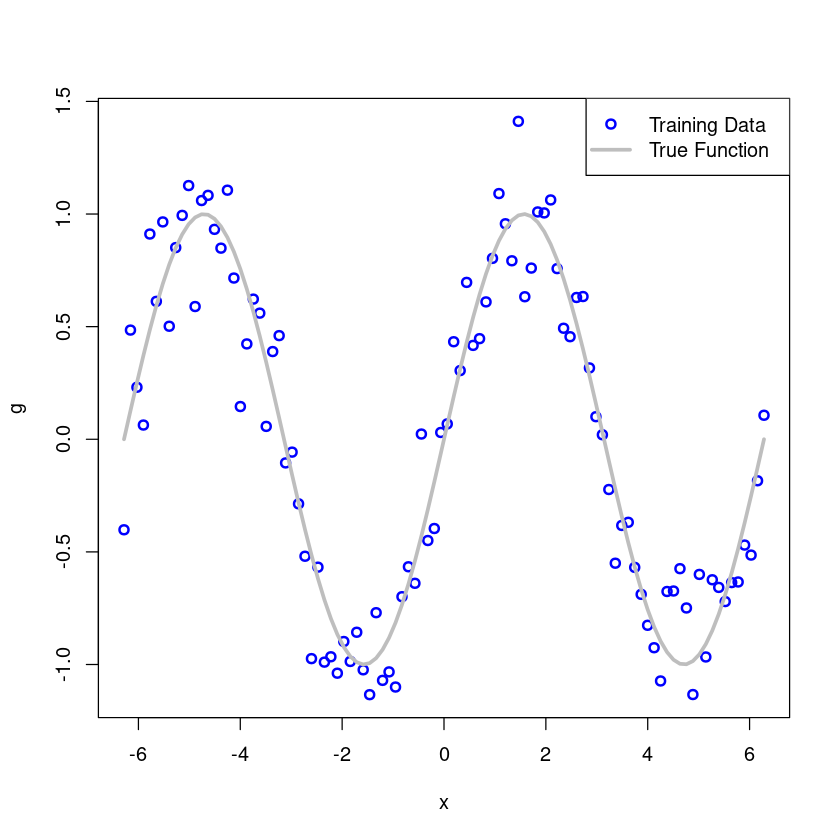

In [2]:
plot(x, g, col="blue", lwd=2)
lines(x, y0, col="grey", lwd=3)
legend("topright", c("Training Data", "True Function"),
       col=c("blue", "grey"), lty=c("blank", "solid"),
       pch=c(1, -1), lwd=c(2, 3))

In [3]:
neuralnet <- function(ni, no, nh, transfer=tanh) {

    hw.fanin <- sqrt(3 / ni)
    hw <- matrix(runif((ni+1)*nh, min=-hw.fanin, max=hw.fanin), ni+1, nh)
    
    vw.fanin <- sqrt(3 / nh)
    vw <- matrix(runif((nh+1)*no, min=-vw.fanin, max=vw.fanin), nh+1, no)
    
    nnet <- list(ni=ni, no=no, nh=no, hw=hw, vw=vw)
    class(nnet) <- "neuralnet"
    
    invisible(nnet)
}

In [4]:
nnet <- neuralnet(1, 1, 20)
nnet

$ni
[1] 1

$no
[1] 1

$nh
[1] 1

$hw
          [,1]      [,2]       [,3]       [,4]      [,5]      [,6]      [,7]
[1,] 1.3417707 -1.026065  0.6140596  0.6517378 1.4892336 0.6002353 1.4751833
[2,] 0.7903796 -1.133177 -1.0010981 -1.6916697 0.3822783 0.1126109 0.1505826
           [,8]      [,9]     [,10]     [,11]      [,12]     [,13]      [,14]
[1,]  0.9822689 -1.546993 -1.392033 0.3923958  0.6313684 -0.448125  0.6990813
[2,] -1.4028072  1.673147  1.615269 1.6067150 -1.1939940  1.722823 -0.3450634
          [,15]      [,16]      [,17]      [,18]      [,19]      [,20]
[1,]  0.6458110  1.5106695 -0.9990522 -0.4003301 -0.5671566 -0.5753098
[2,] -0.4516791 -0.3444654 -0.3698356  1.1552341 -0.9047625 -0.1548726

$vw
              [,1]
 [1,] -0.062093870
 [2,]  0.289882825
 [3,]  0.024492331
 [4,]  0.112794693
 [5,] -0.368496382
 [6,] -0.075655215
 [7,] -0.206610200
 [8,]  0.119197779
 [9,] -0.176758237
[10,] -0.294222155
[11,] -0.004327405
[12,]  0.146925915
[13,]  0.200032998
[14,]  0.30166

In [5]:
# predict is already defined

loss <- function(...)
    UseMethod("loss")

grad <- function(...)
    UseMethod("grad")

fit <- function(...)
    UseMethod("fit")

In [6]:
nnet

$ni
[1] 1

$no
[1] 1

$nh
[1] 1

$hw
          [,1]      [,2]       [,3]       [,4]      [,5]      [,6]      [,7]
[1,] 1.3417707 -1.026065  0.6140596  0.6517378 1.4892336 0.6002353 1.4751833
[2,] 0.7903796 -1.133177 -1.0010981 -1.6916697 0.3822783 0.1126109 0.1505826
           [,8]      [,9]     [,10]     [,11]      [,12]     [,13]      [,14]
[1,]  0.9822689 -1.546993 -1.392033 0.3923958  0.6313684 -0.448125  0.6990813
[2,] -1.4028072  1.673147  1.615269 1.6067150 -1.1939940  1.722823 -0.3450634
          [,15]      [,16]      [,17]      [,18]      [,19]      [,20]
[1,]  0.6458110  1.5106695 -0.9990522 -0.4003301 -0.5671566 -0.5753098
[2,] -0.4516791 -0.3444654 -0.3698356  1.1552341 -0.9047625 -0.1548726

$vw
              [,1]
 [1,] -0.062093870
 [2,]  0.289882825
 [3,]  0.024492331
 [4,]  0.112794693
 [5,] -0.368496382
 [6,] -0.075655215
 [7,] -0.206610200
 [8,]  0.119197779
 [9,] -0.176758237
[10,] -0.294222155
[11,] -0.004327405
[12,]  0.146925915
[13,]  0.200032998
[14,]  0.30166

In [7]:
predict.neuralnet <- function(nnet, x) {
    x1 <- cbind(x, 1)
    z <- tanh(x1 %*% nnet$hw)

    z1 <- cbind(z, 1)
    y <- z1 %*% nnet$vw

    y
}

In [8]:
y <- predict(nnet, x)

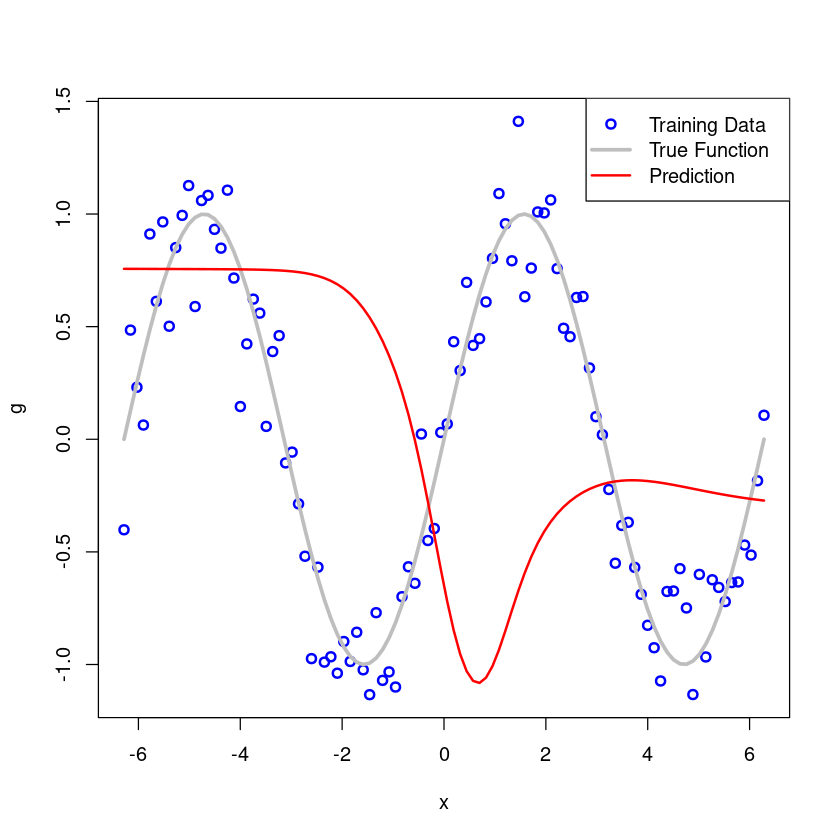

In [9]:
plot(x, g, col="blue", lwd=2)
lines(x, y0, col="grey", lwd=3)
lines(x, y, col="red", lwd=2)
legend("topright", c("Training Data", "True Function", "Prediction"),
       col=c("blue", "grey", "red"), lty=c("blank", "solid", "solid"),
       pch=c(1, -1, -1), lwd=c(2, 3, 2))

In [10]:
grad.neuralnet <- function(nnet, x, g) {
    # forward pass
    x1 <- cbind(x, 1)
    z <- tanh(x1 %*% nnet$hw)
    z1 <- cbind(z, 1)
    y <- z1 %*% nnet$vw

    # error contributions
    delta <- 2 * (y - g) / length(g)

    # derivative of transfer function
    tanh.prime <- function(v) {
        1 - v^2
    }

    # gradient of hidden layer
    hg <- t(x1) %*% (delta %*% t(nnet$vw[-(nnet$nh+1),,drop=FALSE]) * tanh.prime(z))

    # gradient of visible layer
    vg <- t(z1) %*% delta
    
    # loss
    loss <- mean((y - g)^2)

    invisible(list(loss=loss, hg=hg, vg=vg))
}

In [11]:
grad(nnet, x, g)

In [12]:
fit.neuralnet <- function(nnet, x, g, maxiter=1000, lr=0.05) {
    for (iter in 1:maxiter) {
        gradinfo <- grad(nnet, x, g)
        
        if (iter %% 100 == 0)
            print(paste(iter, gradinfo$loss))
        
        nnet$hw <- nnet$hw - lr * gradinfo$hg
        nnet$vw <- nnet$vw - lr * gradinfo$vg
    }
    
    invisible(nnet)
}

In [13]:
nnet <- fit(nnet, x, g)

[1] "100 0.121589547543977"
[1] "200 0.10579856746505"
[1] "300 0.102164916230164"
[1] "400 0.101484685743681"
[1] "500 0.0997109255869789"
[1] "600 0.0957100409701139"
[1] "700 0.0925061658819259"
[1] "800 0.0899917434041947"
[1] "900 0.0880033103529338"
[1] "1000 0.0864533192937475"


In [14]:
y <- predict(nnet, x)

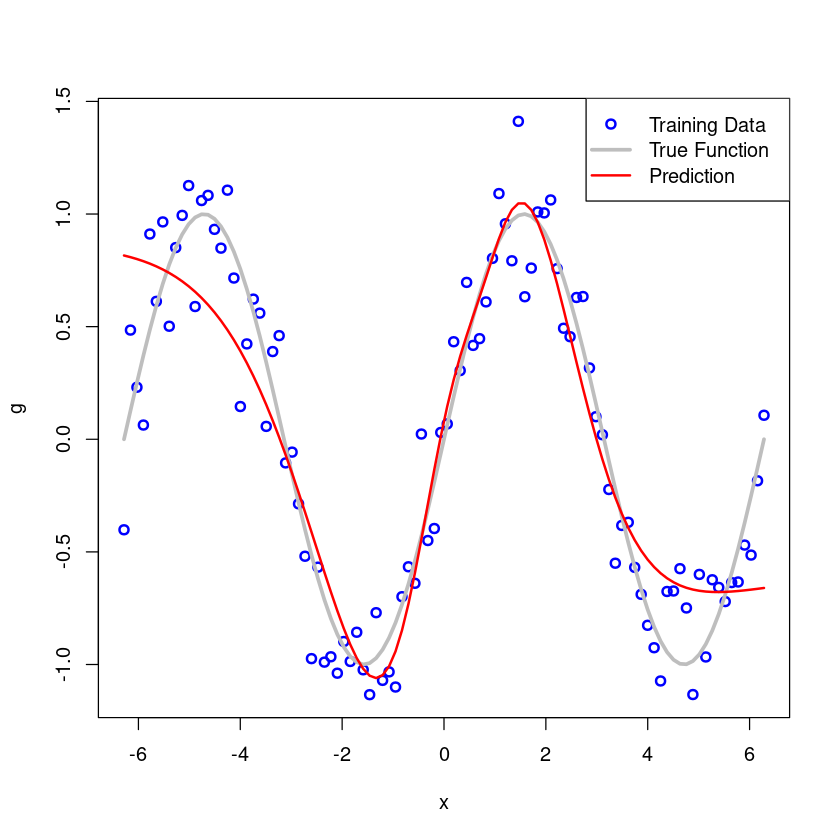

In [15]:
plot(x, g, col="blue", lwd=2)
lines(x, y0, col="grey", lwd=3)
lines(x, y, col="red", lwd=2)
legend("topright", c("Training Data", "True Function", "Prediction"),
       col=c("blue", "grey", "red"), lty=c("blank", "solid", "solid"),
       pch=c(1, -1, -1), lwd=c(2, 3, 2))